In [99]:
from nm_lib import nm_lib as nm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

import scipy.optimize

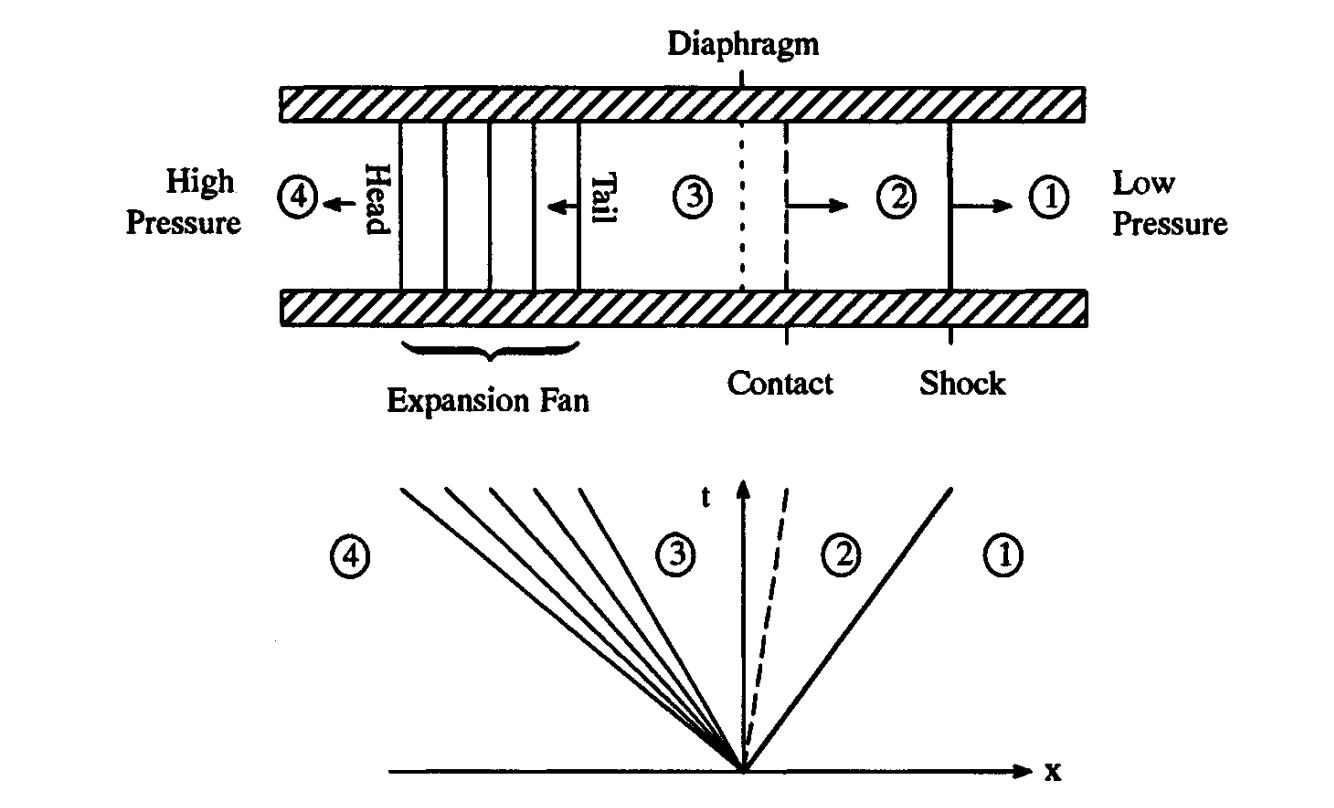

In [31]:
# JMS OK
def get_cs(rho, P, gamma):
    return np.sqrt(gamma*P/rho)

""" SETTING INITIAL CONDITIONS """
gamma = 5/3
u5 = 0 #left
u1 = 0 #right
rho1 = 0.125 #right
rho5 = 1 #left
p1 = 0.125/gamma #right
p5 = 1/gamma #left

a5 = get_cs(rho4, p4, gamma)
a1 = get_cs(rho1, p1, gamma)

def shock_tube_function(p4, p1, p5, rho1, rho5, gamma):
    """
    Shock tube equation
    """
    z = (p4 / p5 - 1.)
    c1 = get_cs(rho1, p1, gamma)
    c5 = get_cs(rho5, p5, gamma)
    
    gm1 = gamma - 1.
    gp1 = gamma + 1.
    g2 = 2. * gamma

    fact = gm1 / g2 * (c5 / c1) * z / np.sqrt(1. + gp1 / g2 * z)
    fact = (1. - fact) ** (g2 / gm1)

    return p1 * fact - p4

p4 = scipy.optimize.fsolve(shock_tube_function, p1, (p1, p5, rho1, rho5, gamma))[0]

p4_p5 = (p4 / p5 - 1.)
c5 = get_cs(rho5, p5, gamma) 

gm1 = gamma - 1.
gp1 = gamma + 1.
gmfac1 = 0.5 * gm1 / gamma
gmfac2 = 0.5 * gp1 / gamma

z = (p4 / p5 - 1.)
fact = np.sqrt(1. + gmfac2 * z)

u4 = c5 * p4_p5 / (gamma * fact)
rho4 = rho5 * (1. + gmfac2 * p4_p5) / (1. + gmfac1 * p4_p5)

# shock speed
w = c5 * fact

# compute values at foot of rarefaction
p3 = p4
u3 = u4
rho3 = rho1 * (p3 / p1)**(1. / gamma)

region1 = [p1, rho1, u1]
#p2=p3, u2=u3, rho2=rho3?
p2 = p3
u2 = u3
rho2=rho3
region2 = [p3, rho3, u3]
region3 = [p3, rho3, u3]
region4 = [p4, rho4, u4]
region5 = [p5, rho5, u5]

# JMS and for the positions: 

p1, rho1 = region1[:2]  # don't need velocity
p3, rho3, u3 = region3
c1 = get_cs(rho1, p1, gamma) 
c3 = get_cs(rho3, p3, gamma) 

def get_locations(xi, t, pl, pr):
    if pl > pr:
        xsh = xi + w * t
        xcd = xi + u3 * t
        xft = xi + (u3 - c3) * t
        xhd = xi - c1 * t
    else:
        # pr > pl
        xsh = xi - w * t
        xcd = xi - u3 * t
        xft = xi - (u3 - c3) * t
        xhd = xi + c1 * t
    return xsh, xcd, xft, xhd

In [97]:
get_locations(0.5, 0.2, p5, p1)

(0.6345323692280881, 0.377904616438, 0.1372061552506667, 0.3)

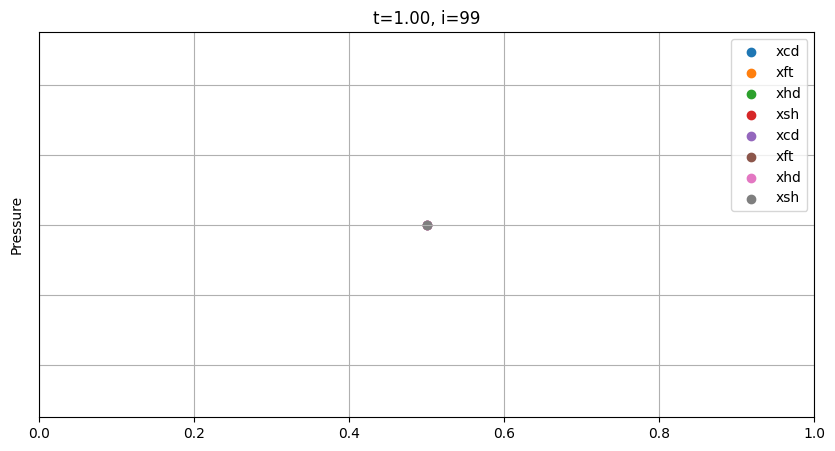

In [98]:
nt = 100
t = np.linspace(0,1, nt)
xx = np.linspace(0, 1, 100)
x0 = 0.5


def axes_pretty(axes):
    axes.set_xlim(0,1)
    axes.grid(True)
    axes.yaxis.set_ticklabels([])
    axes.yaxis.set_ticks_position('none')
    axes.legend(loc="upper right")

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
def init():    
    xsh, xcd, xft, xhd = get_locations(xi, 0, p5, p1)
    
    axes.scatter(xcd, 1, label="xcd")
    axes.scatter(xft, 1, label="xft")
    axes.scatter(xhd, 1, label="xhd")
    axes.scatter(xsh, 1, label="xsh")
    axes.set_ylabel("Pressure")
    axes_pretty(axes)


def animate(i):
    
    axes.clear()
    axes.set_title('t={:.2f}, i={:g}'.format(t[i],i))
    
    xsh, xcd, xft, xhd = get_locations(xi, t[i], p5, p1)

    axes.scatter(xcd, 1, label="xcd")
    axes.scatter(xft, 1, label="xft")
    axes.scatter(xhd, 1, label="xhd")
    axes.scatter(xsh, 1, label="xsh")
    axes_pretty(axes)


anim = FuncAnimation(fig, animate, interval=50, frames=nt, init_func=init)
HTML(anim.to_jshtml())